In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from functions import *

In [79]:
tot_sites = 8
N_e_up = 4
N_e_down = N_e_up
J_11 = 0.1
J_1 = 1
J_33 = 0.5
J_3 = 0.5
U = 0

In [80]:
basis_set = basis_set_generator(tot_sites, N_e_up, N_e_down)

# for i, state in enumerate(basis_set):
#     print(f'{i} ------ {state}')
print(len(basis_set))

4900


In [81]:
hamiltonian = hamiltonian_matrix_generator(basis_set, tot_sites, J_11, J_1, J_33, J_3, U)

# for row in hamiltonian:
#     for element in row:
#         if element == 0:
#             print("    ", end="|")
#         else:
#             print(element, end="|")
#     print()

In [68]:
e_val_arr, e_vec_arr_transpose = np.linalg.eigh(hamiltonian)
e_vec_arr = e_vec_arr_transpose.transpose()

In [69]:
for i, e in enumerate(e_val_arr):
    print(f"{i} ---- {e}")

0 ---- -2.4050498058912746
1 ---- -2.3684938891656655
2 ---- -1.8590953497028542
3 ---- -1.8295175994329163
4 ---- -1.7981100883370507
5 ---- -1.7555053573001853
6 ---- -1.6964908634844647
7 ---- -1.679615771486498
8 ---- -1.6588756697228337
9 ---- -1.6343762865860458
10 ---- -1.631781652636279
11 ---- -1.6279918186080724
12 ---- -1.6273390992066035
13 ---- -1.551917275543532
14 ---- -1.2581514646167742
15 ---- -1.2258491966804055
16 ---- -1.1849189232012942
17 ---- -1.151133982355416
18 ---- -1.1479993105397828
19 ---- -1.1374899303504598
20 ---- -1.1198431068238215
21 ---- -1.1158793886315796
22 ---- -1.0985942636218649
23 ---- -1.0913849559580446
24 ---- -1.0678191227419462
25 ---- -1.0400623141445435
26 ---- -1.0357221088309707
27 ---- -1.0319352170271292
28 ---- -1.012315772453514
29 ---- -1.009919352061531
30 ---- -0.987644403440582
31 ---- -0.9832889125955784
32 ---- -0.9773186686132774
33 ---- -0.9675228645919759
34 ---- -0.961026713246937
35 ---- -0.9129010398353183
36 ---- -0

In [78]:
print(e_vec_arr[69])
print(len(e_vec_arr[28 :32 ]))

[ 7.30694033e-20 -8.44686294e-18  2.39394480e-18 ... -1.21380128e-17
  4.84548917e-17 -2.30143827e-17]
4


In [76]:
topo_states_arr = e_vec_arr[0:1]
# print(topo_states_arr)
d = len(topo_states_arr)

topo_states_ps_arr = np.zeros((d, tot_sites))
for i in range(d):
    for j in range(len(basis_set)):
        topo_states_ps_arr[i] += topo_states_arr[i][j] * basis_set[j][0 : tot_sites]
        topo_states_ps_arr[i] += topo_states_arr[i][j] * basis_set[j][tot_sites : 2 * tot_sites]
    # print(np.linalg.norm(topo_states_ps_arr[i]))
    # print(topo_states_ps_arr[i])
    topo_states_ps_arr[i] = normalize(topo_states_ps_arr[i])

In [75]:
print(topo_states_ps_arr)

[[-0.35355339 -0.35355339 -0.35355339 -0.35355339 -0.35355339 -0.35355339
  -0.35355339 -0.35355339]]


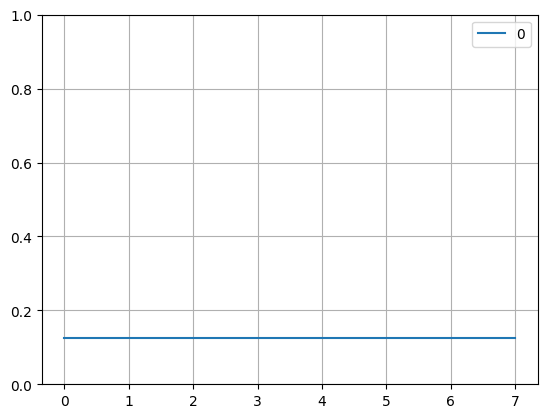

In [73]:
sites_pos = np.arange(tot_sites)
for i in range(d):
    plt.plot(sites_pos, topo_states_ps_arr[i] ** 2, label=f'{i}')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid()
    plt.show()

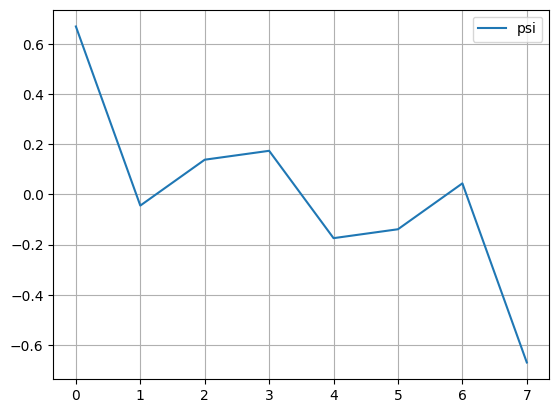

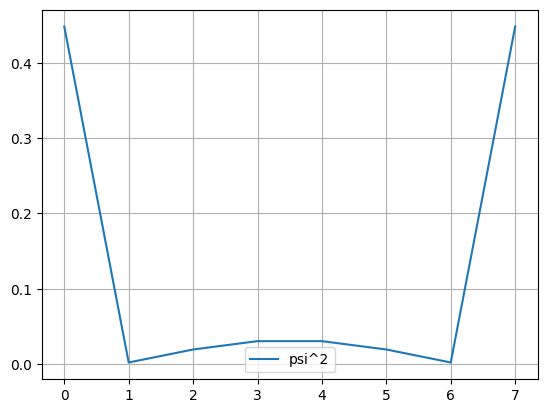

In [47]:
plt.plot(sites_pos, topo_states_ps_arr[4], label='psi')
plt.legend()
plt.grid()
plt.show()
plt.plot(sites_pos, topo_states_ps_arr[4] ** 2, label='psi^2')
plt.legend()
plt.grid()
plt.show()